*Import Explorer Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Import Machine Learning Libraries*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

*Import Dataset*

In [37]:
dataset = pd.read_csv('Iris.csv')

*Explorer Dataset*

In [9]:
for i in dataset.columns: #Checking Columns in dataset
    print (i)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [11]:
dataset.dtypes #Checking type of in each columns

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
for i in dataset.columns: #Checking Null Values
    print('Null values in ',i,' = ',dataset[i].isnull().sum())

Null values in  Id  =  0
Null values in  SepalLengthCm  =  0
Null values in  SepalWidthCm  =  0
Null values in  PetalLengthCm  =  0
Null values in  PetalWidthCm  =  0
Null values in  Species  =  0


In [15]:
dataset.describe() #Show describe of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


*Show dataset in Graph*

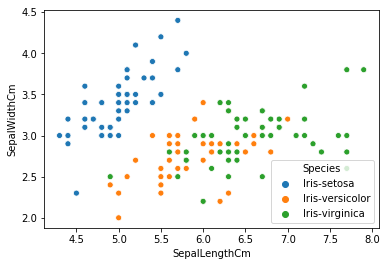

In [24]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = dataset['Species'], data = dataset)

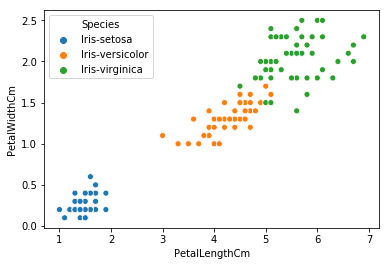

In [25]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = dataset['Species'], data = dataset)

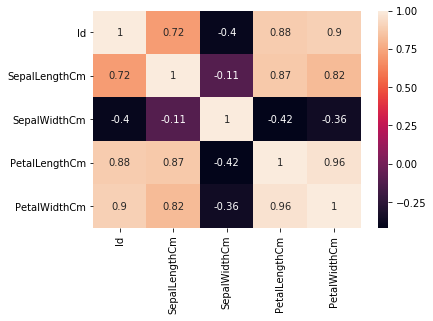

In [33]:
sns.heatmap(dataset.corr(), annot = True)

*Applying Machine Learning*

In [38]:
dataset.drop('Id', inplace = True, axis = 1)#Drop Id column
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
train, test = train_test_split(dataset, test_size = 0.3) #Making Train set and test set
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train['Species']
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test['Species']

In [53]:
classifier = [LogisticRegression, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, RandomForestClassifier]
list_accuracy = []
for model in classifier:
    models = model()
    models.fit(train_x, train_y)
    y_pred = models.predict(test_x)
    list_models = [str(model), accuracy_score(test_y, y_pred)]
    list_accuracy.append(list_models)
    
acc_table = pd.DataFrame(list_accuracy)
acc_table.sort_values(by = 1, ascending = False)

/home/rsudo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rsudo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rsudo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rsudo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fu

,0,1
1,<class 'sklearn.neighbors.classification.KNeig...,1.000000
2,<class 'sklearn.svm.classes.SVC'>,0.977778
0,<class 'sklearn.linear_model.logistic.Logistic...,0.955556
3,<class 'sklearn.naive_bayes.GaussianNB'>,0.955556
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.955556
5,<class 'sklearn.ensemble.forest.RandomForestCl...,0.955556
